In [1]:
import zipfile


zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [3]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent\test'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Testing images:")
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

Training images:
Found 750 images belonging to 10 classes.
Testing images:
Found 2500 images belonging to 10 classes.


In [7]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [9]:
pip install "tensorflow>=2.0.0"


Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install --upgrade tensorflow-hub

Note: you may need to restart the kernel to use updated packages.


In [13]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [15]:

resnet_url = "https://kaggle.com/models/google/resnet-v2/TensorFlow2/50-feature-vector/1"

efficientnet_url = "https://www.kaggle.com/models/tensorflow/efficientnet/TensorFlow2/b0-feature-vector/1"


In [17]:
def create_model(model_url, num_classes=10):
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, 
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) 

 
  model = tf.keras.Sequential([
    feature_extractor_layer, 
    layers.Dense(num_classes, activation='softmax', name='output_layer')
  ])

  return model

In [19]:
import tensorflow as tf
import tensorflow_hub as hub

num_classes = 10  

class KerasLayerWrapper(tf.keras.layers.Layer):
    def __init__(self, model_url, **kwargs):
        super(KerasLayerWrapper, self).__init__(**kwargs)
        self.model = hub.KerasLayer(model_url, trainable=False)
        
    def call(self, inputs):
        return self.model(inputs)


m = tf.keras.Sequential([
    KerasLayerWrapper("https://www.kaggle.com/models/tensorflow/efficientnet/TensorFlow2/b0-feature-vector/1"),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

m.build([None, 224, 224, 3])


In [20]:
m.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [21]:
val_loss, val_acc = m.evaluate(test_data, steps=len(test_data))
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_acc}")


C:\Users\kaust\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 31s 378ms/step - accuracy: 0.0893 - loss: 2.3571
Validation Loss: 2.3646347522735596, Validation Accuracy: 0.0868000015616417


In [24]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',    
    patience=3,            
    restore_best_weights=True  
)

In [27]:
EfficientNetB0_history = m.fit(train_data_10_percent,
                                  epochs=20,
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                  experiment_name="EfficientNetB0")])

Saving TensorBoard log files to: tensorflow_hub/EfficientNetB0/20240813-213907
Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 29s 369ms/step - accuracy: 0.2949 - loss: 2.0670
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 361ms/step - accuracy: 0.7701 - loss: 1.1342
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 356ms/step - accuracy: 0.8395 - loss: 0.7529
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 387ms/step - accuracy: 0.8812 - loss: 0.5999
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 384ms/step - accuracy: 0.8807 - loss: 0.5199
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 374ms/step - accuracy: 0.8879 - loss: 0.4624
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 361ms/step - accuracy: 0.9288 - loss: 0.3830
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 353ms/step - accuracy: 0.9287 - loss: 0.3498
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 355ms/step - accuracy: 0.9425 - loss: 0.3161
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 373ms/step - accuracy: 0.9582 - loss: 0.2849
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 365ms/step - 

In [28]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']

  accuracy = history.history['accuracy']

  epochs = range(len(history.history['loss']))


  plt.plot(epochs, loss, label='training_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

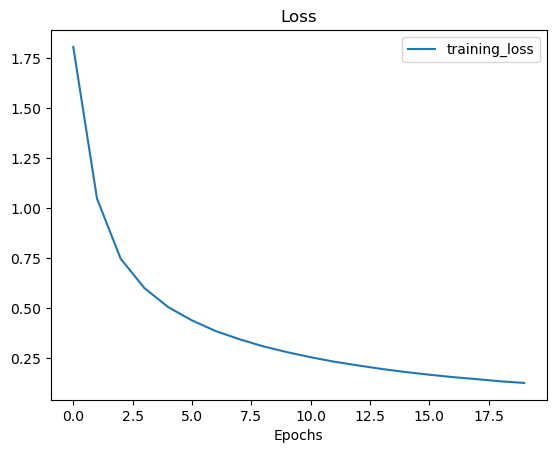

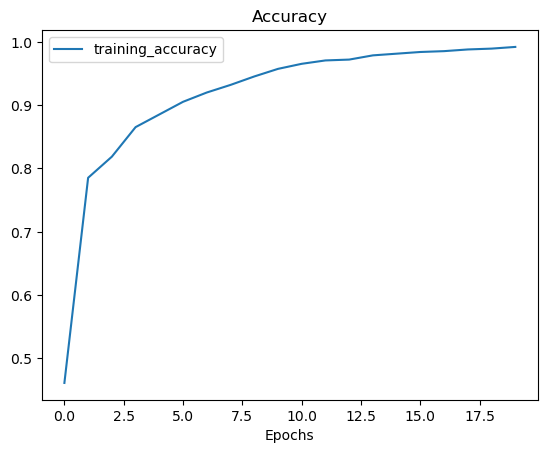

In [33]:
plot_loss_curves(EfficientNetB0_history)

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (384, 512, 3)
Image shape: (382, 512, 3)
Image shape: (512, 512, 3)
Image shape: (384, 512, 3)
Image shape: (341, 512, 3)
Image shape: (384, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (384, 512, 3)
Image shape: (339, 512, 3)


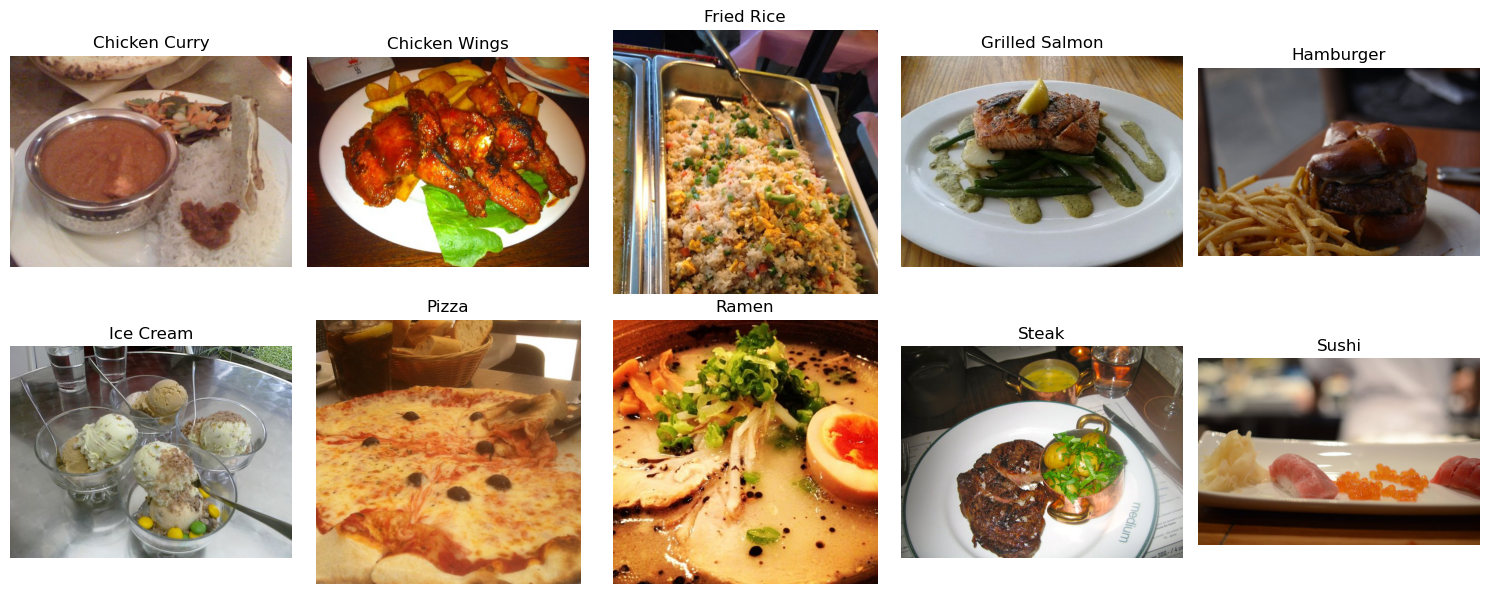

In [37]:
plt.figure(figsize=(15, 6))

plt.subplot(2, 5, 1)
view_random_image("10_food_classes_10_percent/train/", "chicken_curry")
plt.title("Chicken Curry")

plt.subplot(2, 5, 2)
view_random_image("10_food_classes_10_percent/train/", "chicken_wings")
plt.title("Chicken Wings")

plt.subplot(2, 5, 3)
view_random_image("10_food_classes_10_percent/train/", "fried_rice")
plt.title("Fried Rice")

plt.subplot(2, 5, 4)
view_random_image("10_food_classes_10_percent/train/", "grilled_salmon")
plt.title("Grilled Salmon")

plt.subplot(2, 5, 5)
view_random_image("10_food_classes_10_percent/train/", "hamburger")
plt.title("Hamburger")

plt.subplot(2, 5, 6)
view_random_image("10_food_classes_10_percent/train/", "ice_cream")
plt.title("Ice Cream")

plt.subplot(2, 5, 7)
view_random_image("10_food_classes_10_percent/train/", "pizza")
plt.title("Pizza")

plt.subplot(2, 5, 8)
view_random_image("10_food_classes_10_percent/train/", "ramen")
plt.title("Ramen")

plt.subplot(2, 5, 9)
view_random_image("10_food_classes_10_percent/train/", "steak")
plt.title("Steak")

plt.subplot(2, 5, 10)
view_random_image("10_food_classes_10_percent/train/", "sushi")
plt.title("Sushi")

plt.tight_layout()
plt.show()